In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from operator import inv
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy.random as rnd
import time
import copy
from numpy.linalg import inv, norm
import numpy.linalg as linalg

import numpy as np
import pandas as pd

from BMA_FUZZY.fuzzy.plot_frbs import plot_frbs
from BMA_FUZZY.fuzzy.w_min import w_min
from BMA_FUZZY.bma.Population import Population
from BMA_FUZZY.bma.bacterium_module import Bacterium
from BMA_FUZZY.BacterialMemeticAlg4FuzzyRBS import BacterialMemeticAlg4FuzzyRBS
from BMA_FUZZY.Config import Config
from BMA_FUZZY.helpers.helper_functions.Config2Input import config2input
from process_pool import process_initializer
process_initializer()
from definitions import ROOT_DIR

In [2]:
df_reduced = pd.read_csv(f'{ROOT_DIR}/data/df_reduced_simple.csv', sep=';')

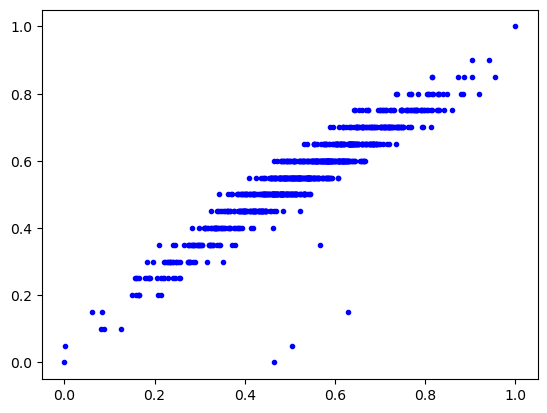

In [3]:
plt.plot(df_reduced['x1'], df_reduced['x2'], 'b.')

In [4]:
observations = np.array([df_reduced['x1'].values.tolist()]).T
desired_outputs = np.array([df_reduced['x2'].values.tolist()]).T
print(observations.shape, desired_outputs.shape)

(1004, 1) (1004, 1)


In [8]:
conf = Config()
conf.n_ind = 30
conf.nr_rules = 3
bma = BacterialMemeticAlg4FuzzyRBS(conf=conf)
bma.fit(observations=observations, desired_outputs=desired_outputs)

bound_ante:  [[0. 1.]]


Error: 1.427743295511024: 100%|██████████| 10/10 [03:53<00:00, 23.38s/it]


In [9]:
Ys = bma.predict(observations)

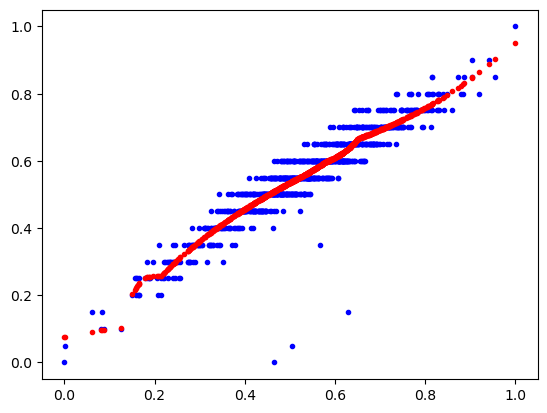

In [10]:
plt.plot(observations, desired_outputs, 'b.')
plt.plot(observations, Ys, 'r.')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/lukacs/BEST/fuzzy-bma/BMA_FUZZY/fuzzy/plot_frbs.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


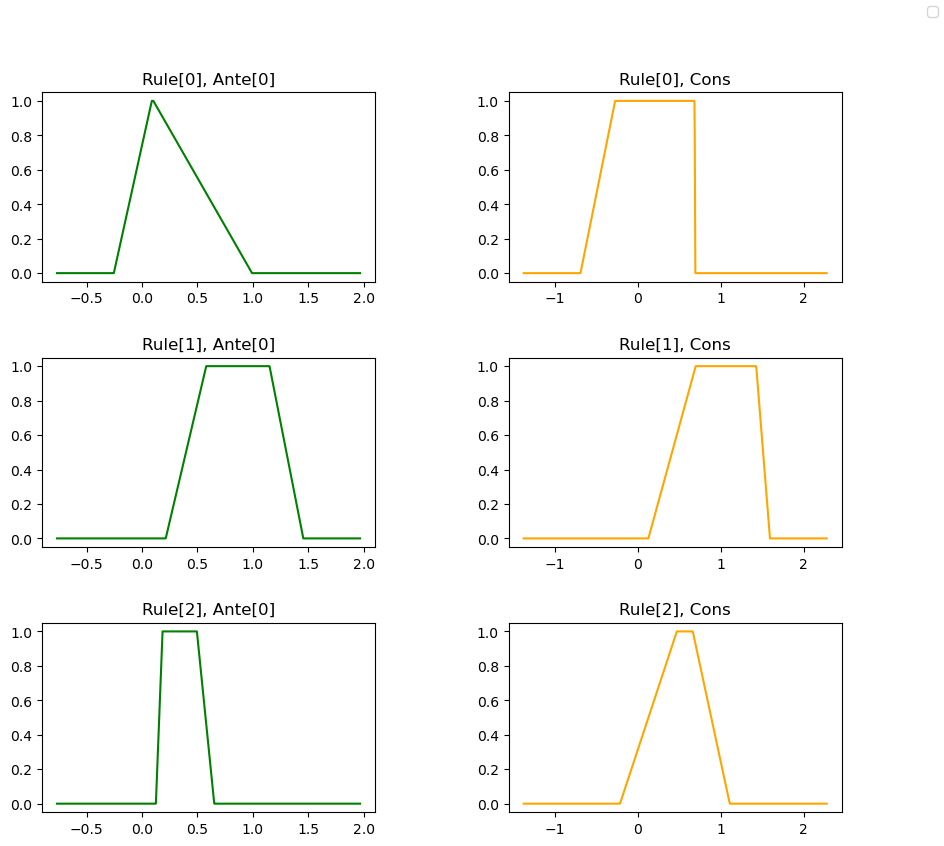

In [11]:
bma.get_solution().plot_fuzzyRBS()